In [1]:
#install.packages('gridExtra')

library(ggplot2)
library(IRdisplay)
library(gridExtra)
library(reshape2)
library(stringr)

In [2]:
#Read datasets
datasets <- list(
    Train = read.csv("wineQuality_train.data"),
    Validation = read.csv("wineQuality_val.data"),
    Test =  read.csv("wineQuality_val.data")
)

In [3]:
set.seed(12345)

interpolate.points <- 0
sample.points <- 1000

if (interpolate.points > 0) {
    # Interpolate points of each class to increase amount of test samples and
    # ensure both classes have same amount of instances during the trainning
    for (cls in c(0, 1)) {
        num_interpolations <- interpolate.points - sum(datasets$Train$quality == cls)
        if (num_interpolations > 0)  {
            cls_instances <- datasets$Train[datasets$Train$quality == cls, ]
            weights <- runif(n = num_interpolations)
            samples1 <- cls_instances[sample(nrow(cls_instances), replace=TRUE, size=num_interpolations), ]
            samples2 <- cls_instances[sample(nrow(cls_instances), replace=TRUE, size=num_interpolations), ]
            interpolations <- weights * samples1 + (1-weights) * samples2
            row.names(interpolations) <- sprintf("interp.%d.%d", cls, 1:num_interpolations)
            #print(sprintf("interp.%d.%d", cls, 1:num_interpolations))
            datasets$Train <- rbind(datasets$Train, interpolations)
        }
    }
}

if (sample.points > 0) {
    # Sample data points to ensure both classes have same amount of instances during the trainning
    train.0 <- datasets$Train[datasets$Train$quality == 0, ]
    train.1 <- datasets$Train[datasets$Train$quality == 1, ]
    datasets$Train <- rbind(
        train.0[sample(nrow(train.0), replace=TRUE, size=1000), ],
        train.1[sample(nrow(train.1), replace=TRUE, size=1000), ]
    )    
}

datasets$Train[sample(nrow(datasets$Train), size=10), ]

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1517.1,7.7,0.580,0.01,1.80,0.088,12,18,0.99568,3.32,0.56,10.5,1
2235,5.7,0.430,0.30,5.70,0.039,24,98,0.99200,3.54,0.61,12.3,1
3148,6.5,0.330,0.30,3.80,0.036,34,88,0.99028,3.25,0.63,12.5,1
1577.2,7.7,0.350,0.49,8.65,0.033,42,186,0.99310,3.14,0.38,12.4,1
3059,6.7,0.140,0.46,1.60,0.036,15,92,0.99264,3.37,0.49,10.9,0
3280.3,7.0,0.170,0.33,4.00,0.034,17,127,0.99340,3.19,0.39,10.6,1
176,11.6,0.580,0.66,2.20,0.074,10,47,1.00080,3.25,0.57,9.0,0
3411,7.7,0.340,0.58,11.10,0.039,41,151,0.99780,3.06,0.49,8.6,0
2410,6.6,0.545,0.04,2.50,0.031,48,111,0.99060,3.14,0.32,11.9,0
78,6.2,0.210,0.27,1.70,0.038,41,150,0.99330,3.49,0.71,10.5,1


In [4]:
for (i in names(datasets$Train)) {
    if (i != 'quality' && min(datasets$Train[[i]] > 0)) {
        for (j in names(datasets)) {
            datasets[[j]][[sprintf("%s.inv",i)]] <- 1 / datasets[[j]][[i]]
        }
    }
}
datasets$Train[sample(nrow(datasets$Train), size=10), ]

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,⋯,fixed.acidity.inv,volatile.acidity.inv,residual.sugar.inv,chlorides.inv,free.sulfur.dioxide.inv,total.sulfur.dioxide.inv,density.inv,pH.inv,sulphates.inv,alcohol.inv
316,7.1,0.380,0.42,11.80,0.041,32.0,193,0.99624,3.04,0.49,⋯,0.1408451,2.631579,0.08474576,24.390244,0.03125000,0.005181347,1.003774,0.3289474,2.040816,0.10000000
2994.1,7.9,0.220,0.49,3.80,0.042,26.0,105,0.99300,3.10,0.39,⋯,0.1265823,4.545455,0.26315789,23.809524,0.03846154,0.009523810,1.007049,0.3225806,2.564103,0.09523810
2425,6.9,0.490,0.10,2.30,0.074,12.0,30,0.99590,3.42,0.58,⋯,0.1449275,2.040816,0.43478261,13.513514,0.08333333,0.033333333,1.004117,0.2923977,1.724138,0.09803922
70,7.4,0.250,0.36,2.05,0.050,31.0,100,0.99200,3.19,0.44,⋯,0.1351351,4.000000,0.48780488,20.000000,0.03225806,0.010000000,1.008065,0.3134796,2.272727,0.09259259
2348,7.2,1.000,0.00,3.00,0.102,7.0,16,0.99586,3.43,0.46,⋯,0.1388889,1.000000,0.33333333,9.803922,0.14285714,0.062500000,1.004157,0.2915452,2.173913,0.10000000
2795,7.6,0.345,0.26,1.90,0.043,15.0,134,0.99360,3.08,0.38,⋯,0.1315789,2.898551,0.52631579,23.255814,0.06666667,0.007462687,1.006441,0.3246753,2.631579,0.10526316
1968.2,7.2,0.250,0.28,14.40,0.055,55.0,205,0.99860,3.12,0.38,⋯,0.1388889,4.000000,0.06944444,18.181818,0.01818182,0.004878049,1.001402,0.3205128,2.631579,0.11111111
2010,7.3,0.260,0.33,17.85,0.049,41.5,195,1.00000,3.06,0.44,⋯,0.1369863,3.846154,0.05602241,20.408163,0.02409639,0.005128205,1.000000,0.3267974,2.272727,0.10989011
1713,6.0,0.280,0.35,1.90,0.037,16.0,120,0.99330,3.16,0.69,⋯,0.1666667,3.571429,0.52631579,27.027027,0.06250000,0.008333333,1.006745,0.3164557,1.449275,0.09433962
1938,8.2,0.180,0.49,1.10,0.033,28.0,81,0.99230,3.00,0.68,⋯,0.1219512,5.555556,0.90909091,30.303030,0.03571429,0.012345679,1.007760,0.3333333,1.470588,0.09615385


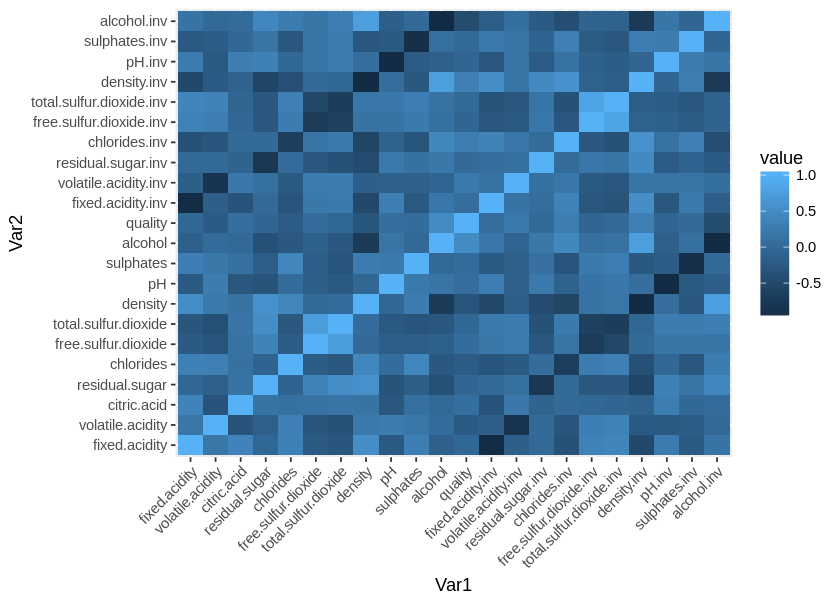

In [5]:
# View Correlation Matrix
correlation_matrix <- cor(datasets$Train)
#correlation_matrix
options(repr.plot.width=7, repr.plot.height=5)
p <- ggplot(data = melt(correlation_matrix), aes(x=Var1, y=Var2, fill=value)) 
p <- p + geom_tile()
p <- p + theme(axis.text.x = element_text(angle=45, hjust=1))
p

In [6]:
combine.attributes <- function(datasets, attribute.names, degree=2) {
    # Let's create every combination possible (up to the specified degree) and see what turns out to be useful
    if (missing(attribute.names)) {
        attribute.names <- names(datasets[[1]])
        attribute.names <- sort(attribute.names[attribute.names != 'quality'])
    }
    attributes <- list(attribute.names)
    sep <- '_X_'
    
    if (degree >= 2) {
        for (deg in 2:degree) {
            base.factors <- attributes[[deg-1]]
            new.factors <- c()
            for (base in base.factors) {
                sliced.base <- strsplit(base, sep, fixed = TRUE)[[1]]
                last.base <- sliced.base[length(sliced.base)]

                for (attr in attribute.names) {
                    if (!any(sprintf('%s.inv', attr) == sliced.base) && !any(attr == sprintf('%s.inv', sliced.base))) {                        
                        if (last.base <= attr) {
                            new.factor <- sprintf("%s%s%s", base, sep, attr)
                            new.factors <- c(new.factors, new.factor)
                            for (ds in names(datasets)) {
                                datasets[[ds]][[new.factor]] <- datasets[[ds]][[base]] * datasets[[ds]][[attr]]
                            }
                        }
                    }
                }
            }
            attributes[[deg]] <- new.factors
        }
    }

    datasets
}

combined.attrs.datasets <- combine.attributes(datasets, degree=2)
head(combined.attrs.datasets$Train)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,⋯,sulphates.inv_X_volatile.acidity,sulphates.inv_X_volatile.acidity.inv,total.sulfur.dioxide_X_total.sulfur.dioxide,total.sulfur.dioxide_X_volatile.acidity,total.sulfur.dioxide_X_volatile.acidity.inv,total.sulfur.dioxide.inv_X_total.sulfur.dioxide.inv,total.sulfur.dioxide.inv_X_volatile.acidity,total.sulfur.dioxide.inv_X_volatile.acidity.inv,volatile.acidity_X_volatile.acidity,volatile.acidity.inv_X_volatile.acidity.inv
2800,6.0,0.520,0.33,7.70,0.046,24,119,0.99224,3.04,0.38,⋯,1.3684211,5.060729,14161,61.880,228.84615,7.061648e-05,0.004369748,0.016160310,0.270400,3.698225
3404,10.7,0.670,0.22,2.70,0.107,17,34,1.00040,3.28,0.98,⋯,0.6836735,1.522997,1156,22.780,50.74627,8.650519e-04,0.019705882,0.043898156,0.448900,2.227668
2959,7.3,0.360,0.62,7.10,0.033,48,185,0.99472,3.14,0.62,⋯,0.5806452,4.480287,34225,66.600,513.88889,2.921841e-05,0.001945946,0.015015015,0.129600,7.716049
3447,6.2,0.235,0.34,1.90,0.036,4,117,0.99032,3.40,0.44,⋯,0.5340909,9.671180,13689,27.495,497.87234,7.305136e-05,0.002008547,0.036370249,0.055225,18.107741
1789,6.5,0.130,0.27,2.60,0.035,32,76,0.99140,3.21,0.76,⋯,0.1710526,10.121457,5776,9.880,584.61538,1.731302e-04,0.001710526,0.101214575,0.016900,59.171598
659,6.7,0.610,0.21,1.65,0.117,40,240,0.99380,3.11,0.57,⋯,1.0701754,2.876043,57600,146.400,393.44262,1.736111e-05,0.002541667,0.006830601,0.372100,2.687450


In [7]:
print_accuracy_table <- function(predicted, expected) {
    pred_table <- as.matrix(table(Predicted = (predicted >= 0.5), Expected = (expected >= 0.5)))
    print(pred_table)
    print(sprintf("Acuracy: %.2f", (pred_table[1,1] + pred_table[2,2]) / sum(pred_table)))
    print(sprintf("True Positive Acuracy: %.2f", (pred_table[2,2]) / (pred_table[2,2] + pred_table[1,2])))
    print(sprintf("True Negative Acuracy: %.2f", (pred_table[1,1]) / (pred_table[1,1] + pred_table[2,1])))
}

test.formula <- function(title, formula) {
    model = glm(formula, datasets$Train, family=binomial(link="logit"))
    print(summary(model))
    for (i in 1:length(datasets)) {
        dataset <- datasets[[i]]
        predictions <- predict(model, dataset, type = "response")
        print_accuracy_table(predictions, dataset$quality)
    }
}

In [8]:
#Normalize datasets
for (i in names(datasets$Train)) {
    if (i != 'quality') {
        m <- mean(datasets$Train[[i]])
        d <- sd(datasets$Train[[i]])

        for (j in names(datasets)) {
            datasets[[j]][[i]] <- (datasets[[j]][[i]] - m) / d
        }
    }
}
datasets$Train[sample(nrow(datasets$Train), size=10), ]

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,⋯,fixed.acidity.inv,volatile.acidity.inv,residual.sugar.inv,chlorides.inv,free.sulfur.dioxide.inv,total.sulfur.dioxide.inv,density.inv,pH.inv,sulphates.inv,alcohol.inv
3058,-0.07480211,-0.88027579,-0.7023762,0.09906914,2.1553040,-0.2480585,-0.20806497,0.4733298,-1.14715930,0.05508072,⋯,-0.07949591,1.0277969,-0.72001326,-1.69716791,-0.2794695,-0.2766849,-0.4759301,1.1769344,-0.32060013,1.175052648
27,-1.56093679,-0.07916023,-0.9284144,-0.64171862,-0.7441675,-0.2480585,0.03159874,-1.6894545,2.15429259,-0.52505557,⋯,2.22748791,-0.3124535,0.19730806,1.55679978,-0.2794695,-0.3365300,1.6960048,-2.0143360,0.35898058,-1.481556387
976,0.50313915,0.65519570,0.4278150,0.63782387,0.2827287,1.0647363,0.52936182,0.8701710,1.13846124,0.31291906,⋯,-0.68537045,-0.8682320,-0.91768520,-0.76698658,-0.6207039,-0.4262978,-0.8713552,-1.1363756,-0.55493831,-0.220337956
3800.2,-0.15736515,-1.14731431,-0.3256458,-0.19275634,-0.6837618,-1.0238009,-0.15275796,-0.1649231,0.12262989,-0.46059598,⋯,0.01709278,1.9510805,-0.52290290,1.26927246,0.4262652,-0.2917860,0.1620490,-0.1717031,0.27033962,0.252618955
1306,-0.32249122,1.18927274,0.2771229,1.40105974,1.3398277,-0.7851110,-0.42929300,0.8106448,-0.70273308,-0.26721722,⋯,0.21891991,-1.1188376,-1.05648527,-1.43977398,0.1005415,-0.2064318,-0.8121021,0.6851804,0.02612472,0.975192015
46.1,0.75082826,-0.67999690,0.7291994,2.09695127,-0.2307194,0.8260463,0.87963954,2.0937645,-0.06783849,1.02197452,⋯,-0.91257340,0.5556632,-1.12669619,-0.05400667,-0.5834783,-0.4716406,-2.0846101,0.0198790,-1.05927482,2.067453616
3238,1.49389560,1.05575348,-0.6270301,-0.54070211,1.2794220,0.2293214,-0.17119363,1.3992925,-0.76622254,-0.00937887,⋯,-1.50227994,-1.0640176,-0.05287049,-1.41482564,-0.4531888,-0.2868473,-1.3971097,0.7540712,-0.25648874,1.383602875
2906.2,-0.65274338,0.58843607,-0.1749536,-0.46213371,-0.6535590,1.0647363,0.89807521,-0.4195628,1.96382421,1.66657039,⋯,0.66101741,-0.8300299,-0.19880797,1.13988517,-0.6207039,-0.4737361,0.4172718,-1.8557808,-1.39588607,-0.710811790
3215.2,-0.81786945,-0.14591986,1.7840445,-0.55192616,-0.2307194,0.9453913,1.17461025,-0.5187731,0.50356665,0.24845948,⋯,0.90380867,-0.2417181,-0.02904396,-0.05400667,-0.6028832,-0.5023580,0.5168164,-0.5444175,-0.49943716,-0.145127683
3036.1,-0.15736515,-0.47971801,-0.4763379,-0.01317143,-0.8347760,0.2889939,0.36344079,0.2749092,-0.38528578,1.21535328,⋯,0.01709278,0.1968416,-0.65586492,2.07794304,-0.4694750,-0.4003649,-0.2778598,0.3472662,-1.17007602,0.009510263


In [9]:
#Baseline: Linear on every variable
test.formula("Foo", quality ~ .)


Call:
glm(formula = formula, family = binomial(link = "logit"), data = datasets$Train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-3.11654  -0.74478   0.00312   0.79684   2.67845  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -0.00622    0.05946  -0.105 0.916693    
fixed.acidity             0.61115    0.28181   2.169 0.030109 *  
volatile.acidity         -0.35775    0.15994  -2.237 0.025306 *  
citric.acid              -0.10514    0.07586  -1.386 0.165728    
residual.sugar            0.41799    0.18154   2.302 0.021307 *  
chlorides                -0.05769    0.11921  -0.484 0.628456    
free.sulfur.dioxide      -0.11210    0.10543  -1.063 0.287654    
total.sulfur.dioxide      0.06890    0.11879   0.580 0.561875    
density                  23.39879   25.95063   0.902 0.367235    
pH                        2.26990    0.88652   2.560 0.010453 *  
sulphates                 0.24488    0.16788   

In [10]:
find.great.parameters <- function(train.dataset, max.p.value = 0.1, max.params=20) {
    usable.attrs <- names(train.dataset)
    usable.attrs <- usable.attrs[usable.attrs != 'quality']

    selected.attrs <- c()
    selected.formula <- NULL
    selected.model <- NULL
    
    while (T) {
        if (length(usable.attrs) == 0 || length(selected.attrs) >= max.params) {
            break
        }
        best.p <- Inf
        best.attr <- NULL
        best.formula <- NULL
        best.model <- NULL

        for (attr in usable.attrs) {
            formula <- sprintf('quality ~ %s', paste(c(selected.attrs, attr), collapse = '+'))
            formula <- as.formula(formula)
            #print(formula)
            model <- glm(formula = formula, family = binomial(link = "logit"), data = train.dataset)
            #print('model')
            p.value <- coef(summary(model))[,4][[attr]]
            #print(sprintf("%s -> p=%.2f", as.character(formula), p.value))
            if (p.value < best.p) {
                best.attr <- attr
                best.p <- p.value
                best.formula <- formula
                best.model <- model
            }
        }
        if (best.p > max.p.value) {
            print(sprintf("P-value too high, stopping to add new terms (Next best is '%s' (p=%.2f)", best.attr, best.p))
            break
        }
        #print(sprintf("Adding attribute: %s / p=%.2f", best.attr, best.p))
        selected.formula <- best.formula
        selected.model <- best.model
        selected.attrs <- c(selected.attrs, best.attr)
        usable.attrs <- usable.attrs[usable.attrs != best.attr]
        #print(selected.attrs)
        #print_accuracy_table(predict(selected.model, combined.attrs.datasets$Validation), combined.attrs.datasets$Validation$quality, type = "response")
    }
    selected.attrs
}
great.parameters <- find.great.parameters(combined.attrs.datasets$Train)
#plot.accuracy(combined.attrs.datasets, great.parameters)


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

In [11]:
find.great.parameters2 <- function(datasets, min.cor = 0.01, max.params=20) {
    usable.attrs <- names(datasets$Train)
    usable.attrs <- usable.attrs[usable.attrs != 'quality']

    selected.attrs <- c()
    selected.formula <- quality ~ 1
    selected.model <- glm(formula = selected.formula, family = binomial(link = "logit"), data = datasets$Train)
    
    while (T) {
        if (length(usable.attrs) == 0 || length(selected.attrs) >= max.params) {
            break
        }
        residuals <- predict(selected.model, datasets$Train, type = "response") - datasets$Train$quality
        best.attr <- NULL
        best.cor <- 0
        for (attr in usable.attrs) {
            attr.cor <- abs(cor(datasets$Train[[attr]], residuals))
            if (attr.cor > best.cor) {
                best.attr <- attr
                best.cor <- attr.cor
            }
        }
        
        if (best.cor < min.cor) {
            print(sprintf("Correlation too low, stopping to add new terms (Next best is '%s' (cor=%.2f)", best.attr, best.cor))
            break
        }
        
        #print(sprintf("Adding attribute: %s (cor=%.2f)", best.attr, best.cor))
        selected.attrs <- c(selected.attrs, best.attr)
        selected.formula <- as.formula(sprintf('quality ~ %s', paste(selected.attrs, collapse = '+')))
        selected.model <- glm(formula = selected.formula, family = binomial(link = "logit"), data = datasets$Train)

        usable.attrs <- usable.attrs[usable.attrs != best.attr]
        #print(selected.attrs)
        #print_accuracy_table(predict(selected.model, combined.attrs.datasets$Validation), combined.attrs.datasets$Validation$quality, type = "response")
    }
    selected.attrs
}
great.parameters2 <-find.great.parameters2(combined.attrs.datasets)
great.parameters2
#plot.accuracy(combined.attrs.datasets, great.parameters2)

[1] "alcohol_X_alcohol"                             
 [2] "fixed.acidity_X_volatile.acidity.inv"          
 [3] "residual.sugar.inv_X_sulphates.inv"            
 [4] "free.sulfur.dioxide.inv_X_sulphates.inv"       
 [5] "pH_X_pH"                                       
 [6] "sulphates_X_total.sulfur.dioxide.inv"          
 [7] "alcohol.inv_X_chlorides.inv"                   
 [8] "residual.sugar_X_volatile.acidity.inv"         
 [9] "free.sulfur.dioxide_X_residual.sugar"          
[10] "volatile.acidity_X_volatile.acidity"           
[11] "chlorides.inv_X_volatile.acidity.inv"          
[12] "free.sulfur.dioxide_X_sulphates"               
[13] "citric.acid_X_free.sulfur.dioxide.inv"         
[14] "total.sulfur.dioxide_X_volatile.acidity.inv"   
[15] "sulphates_X_total.sulfur.dioxide"              
[16] "free.sulfur.dioxide_X_sulphates.inv"           
[17] "citric.acid_X_volatile.acidity"                
[18] "citric.acid_X_volatile.acidity.inv"            
[19] "free.sulfur.dioxide_X_total.sulfur.dioxide.inv"
[20] "residual.sugar.inv_X_residual.sugar.inv"

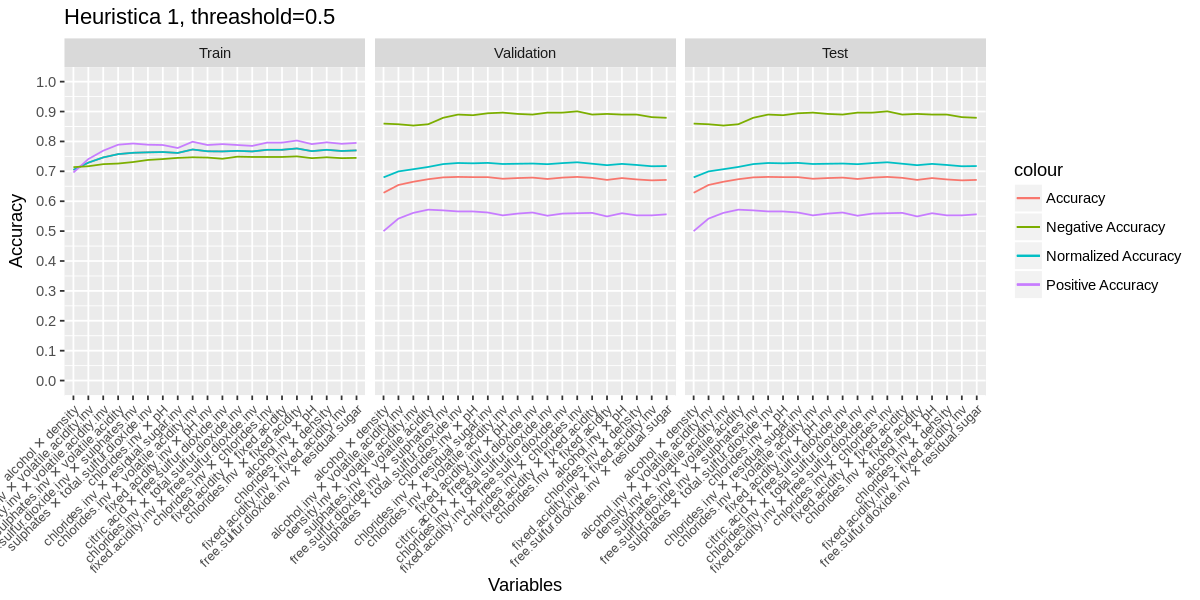

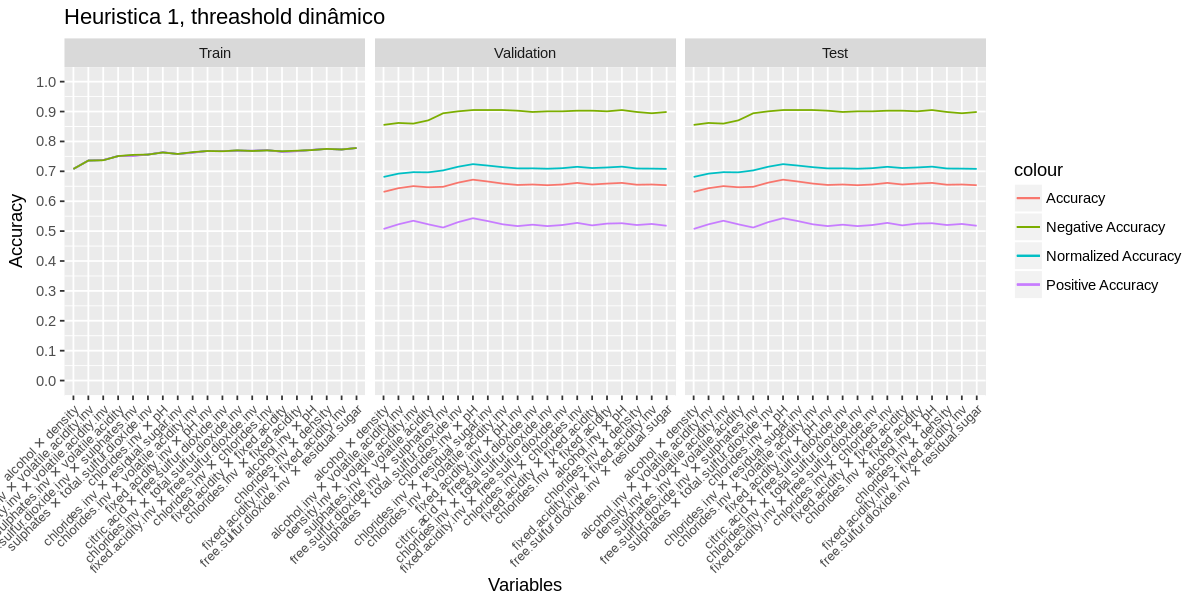

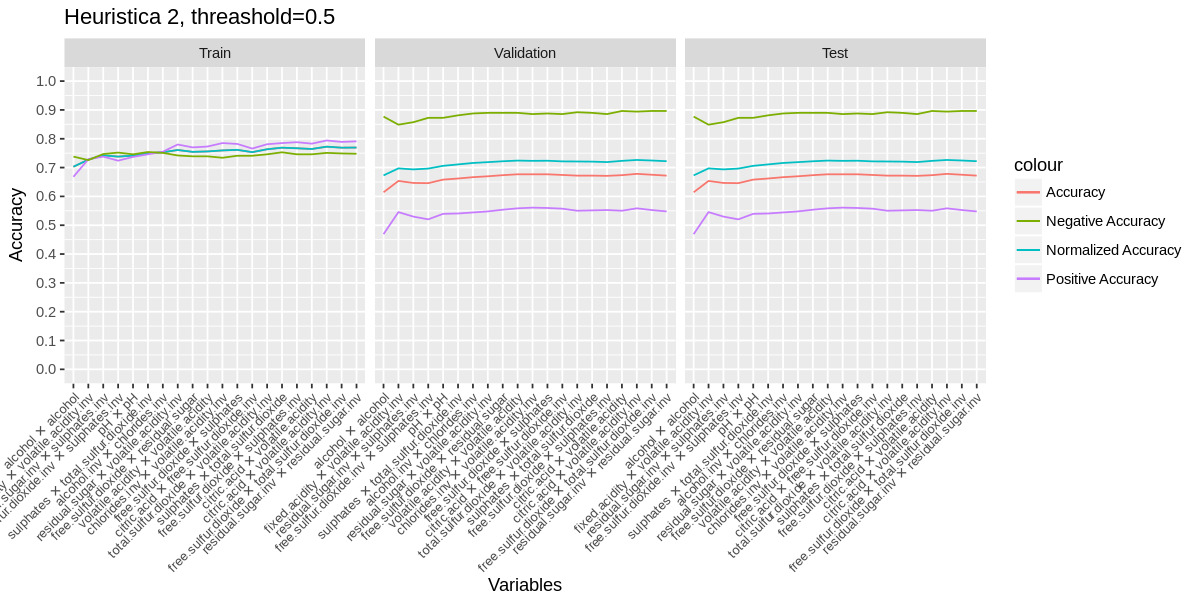

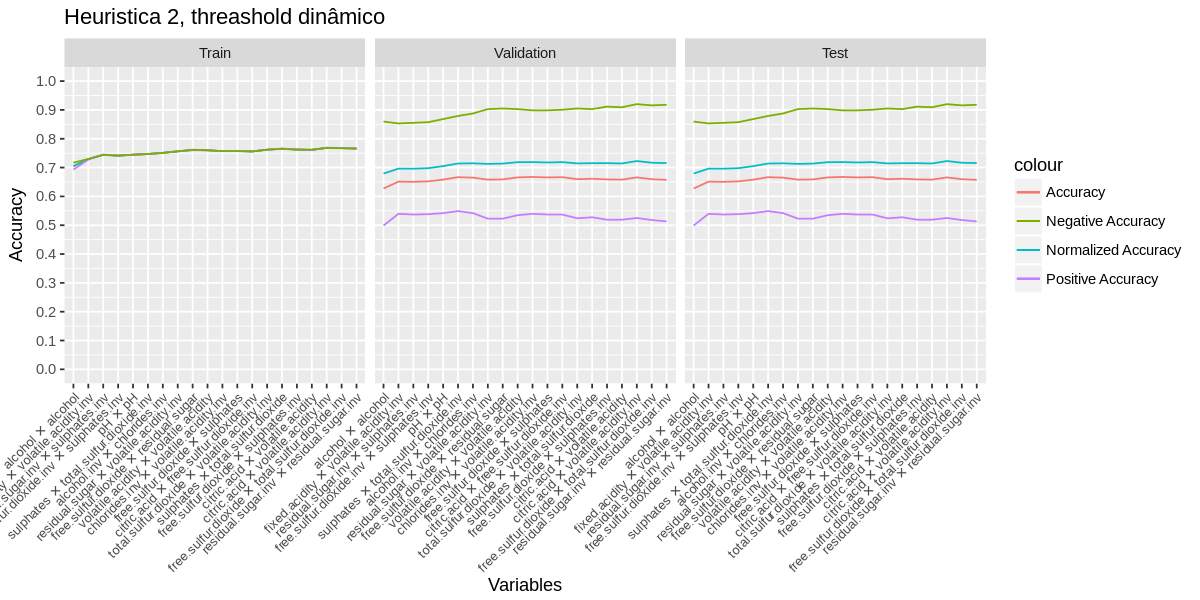

In [58]:
precision.curve <- function(predicted, expected) {
    data <- data.frame(predicted = predicted, expected = expected)
    data <- data[order(predicted), ]
    
    false.positives <- sum(expected == 0)
    false.negatives <- 0
    true.positives <- sum(expected == 1)
    true.negatives <- 0
    
    curve <- data.frame(
        threshold = -Inf,
        false.positives = false.positives,
        false.negatives = false.negatives,
        true.positives = true.positives,
        true.negatives = true.negatives
    )
    
    for ( row in 1:nrow(data) ) {
        if ( data$expected[row] ) {
            true.positives <- true.positives - 1;
            false.negatives <- false.negatives + 1;
        } else {
            false.positives <- false.positives - 1;
            true.negatives <- true.negatives + 1;            
        }
        curve[nrow(curve) + 1,] = list(
            threshold = data$predicted[row],
            false.positives = false.positives,
            false.negatives = false.negatives,
            true.positives = true.positives,
            true.negatives = true.negatives
        )
    }
    curve$accuracy <- (curve$true.positive + curve$true.negative) / (curve$true.positive + curve$true.negative + curve$false.positive + curve$false.negative)
    curve$positive.accuracy <- (curve$true.positive) / (curve$true.positive + curve$false.negative)
    curve$negative.accuracy <- (curve$true.negative) / (curve$true.negative + curve$false.positive)
    
    curve
}

find.threshold <- function(prediction, expected) {
    curve <- precision.curve(prediction, expected)
    #display(curve[100 * 1:(nrow(curve)/100) ,])
    
    a <- max(curve$threshold[curve$positive.accuracy > curve$negative.accuracy])
    b <- min(curve$threshold[curve$positive.accuracy < curve$negative.accuracy])
    #print(sprintf("%.2f -- %.2f -- %.2f", a, b, (a+b)/2))
    (a+b) / 2
}

plot.accuracy <- function(title, datasets, attrs, search_threshold = F) {
    models <- list()
    thresholds <- list()
    for (i in 1:length(attrs)) {
        formula <- as.formula(sprintf('quality ~ %s', paste(attrs[1:i], collapse = '+')))
        models[[i]] <- glm(formula = formula, family = binomial(link = "logit"), data = datasets$Train)
        if (search_threshold) {
            thresholds[[i]] <- find.threshold(predict(models[[i]], datasets$Train, type = "response"), datasets$Train$quality)
        } else {
            thresholds[[i]] <- 0.5
        }
    }
    
    all.metrics <- data.frame(
        num.variables=c(),
        group=c(),
        true.positive=c(),
        true.negative=c(), 
        false.positive=c(),
        false.negative=c()
    )
    all.densities <- data.frame(
        group = c(),
        num.variables = c(),
        value = c(),
        expected = c()
    )
    for (dataset.name in names(datasets)) {
        dataset <- datasets[[dataset.name]]
        metrics <- data.frame(
            num.variables=1:length(attrs),
            group=dataset.name,
            true.positive=numeric(length(attrs)),
            true.negative=numeric(length(attrs)), 
            false.positive=numeric(length(attrs)),
            false.negative=numeric(length(attrs))
        )
        
        for (i in 1:length(attrs)) {
            prediction <- predict(models[[i]], dataset, type = "response")
            expected <- dataset$quality
            threshold <- thresholds[[i]]
            bin.prediction <- prediction > threshold
            bin.expected   <- expected > .5
            metrics$true.positive[i] <- sum(bin.prediction & bin.expected)
            metrics$true.negative[i] <- sum(!bin.prediction & !bin.expected)
            metrics$false.positive[i] <- sum(bin.prediction & !bin.expected)
            metrics$false.negative[i] <- sum(!bin.prediction & bin.expected)
            
            all.densities <- rbind(all.densities, data.frame(
                group = dataset.name,
                num.variables = i,
                value = prediction,
                expected = dataset$quality
            ))
        }
        all.metrics <- rbind(all.metrics, metrics)
    }
    metrics <- NULL
    all.metrics$accuracy <- (all.metrics$true.positive + all.metrics$true.negative) / (all.metrics$true.positive + all.metrics$true.negative + all.metrics$false.positive + all.metrics$false.negative)
    all.metrics$positive.accuracy <- (all.metrics$true.positive) / (all.metrics$true.positive + all.metrics$false.negative)
    all.metrics$negative.accuracy <- (all.metrics$true.negative) / (all.metrics$true.negative + all.metrics$false.positive)
    all.metrics$normalized.accuracy <- (all.metrics$positive.accuracy + all.metrics$negative.accuracy) / 2
    

    options(repr.plot.width=10, repr.plot.height=5)
    p1 <- ggplot(data=all.metrics, aes(x=num.variables))
    p1 <- p1 + geom_line(aes(y=accuracy, color='Accuracy'))
    p1 <- p1 + geom_line(aes(y=normalized.accuracy, color='Normalized Accuracy'))
    p1 <- p1 + geom_line(aes(y=positive.accuracy, color='Positive Accuracy'))
    p1 <- p1 + geom_line(aes(y=negative.accuracy, color='Negative Accuracy'))
    p1 <- p1 + facet_wrap(~group)
    p1 <- p1 + scale_y_continuous(name ="Accuracy", limits = c(0, 1), breaks = 0:10 / 10)
    p1 <- p1 + scale_x_discrete(name ="Variables", limits=1:length(attrs), labels=str_replace_all(attrs, '_X_', ' ✕ '))
    p1 <- p1 + theme(axis.text.x = element_text(size=8, angle=45, hjust=1))
    p1 <- p1 + labs(title = title)
    display(p1)
    
    p2 <- ggplot(data=all.densities, aes(value, x=num.variables, group=num.variables))
    p2 <- p2 + geom_violin()
    p2 <- p2 + facet_wrap(~group)
    #p2 <- p2 + scale_y_continuous(name ="Accuracy", limits = c(0, 1), breaks = 0:10 / 10)
    p2 <- p2 + scale_x_discrete(name ="Variables", limits=1:length(attrs), labels=str_replace_all(attrs, '_X_', ' ✕ '))
    p2 <- p2 + theme(axis.text.x = element_text(size=8, angle=45, hjust=1))
    #display(p2)
    list(models = models, thresholds = thresholds, metrics = all.metrics)
}

#great.parameters
z <- plot.accuracy("Heuristica 1, threashold=0.5", combined.attrs.datasets, great.parameters, search_threshold = F)
z <- plot.accuracy("Heuristica 1, threashold dinâmico", combined.attrs.datasets, great.parameters, search_threshold = T)
z <- plot.accuracy("Heuristica 2, threashold=0.5", combined.attrs.datasets, great.parameters2, search_threshold = F)
z <- plot.accuracy("Heuristica 2, threashold dinâmico", combined.attrs.datasets, great.parameters2, search_threshold = T)
#plot.accuracy(combined.attrs.datasets, great.parameters2)
#plot.accuracy(combined.attrs.datasets, c('alcohol', 'volatile.acidity', 'free.sulfur.dioxide_X_sulphates', 'density_X_free.sulfur.dioxide'))

In [13]:
data.frame(Heurist1 = great.parameters, Heurist2 = great.parameters2)

Heurist1,Heurist2
alcohol_X_density,alcohol_X_alcohol
alcohol.inv_X_volatile.acidity.inv,fixed.acidity_X_volatile.acidity.inv
density.inv_X_volatile.acidity.inv,residual.sugar.inv_X_sulphates.inv
sulphates.inv_X_volatile.acidity,free.sulfur.dioxide.inv_X_sulphates.inv
free.sulfur.dioxide.inv_X_sulphates.inv,pH_X_pH
sulphates_X_total.sulfur.dioxide.inv,sulphates_X_total.sulfur.dioxide.inv
chlorides.inv_X_pH,alcohol.inv_X_chlorides.inv
chlorides.inv_X_residual.sugar.inv,residual.sugar_X_volatile.acidity.inv
chlorides.inv_X_volatile.acidity.inv,free.sulfur.dioxide_X_residual.sugar
fixed.acidity.inv_X_pH.inv,volatile.acidity_X_volatile.acidity
